In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/mobile.csv', index_col=0)
data.head()

,battery_power,clock_speed,four_g,int_memory,n_cores,pc,ram,talk_time,touch_screen,wifi,price_range
0,1142,1.4,0,6,8,8,663,5,1,1,0
1,728,1.7,1,5,2,20,834,5,1,0,0
2,1868,0.5,1,40,8,17,298,17,1,0,0
3,890,2.2,0,44,8,13,751,3,0,0,0
4,1433,1.6,0,4,8,11,258,4,1,1,0


### 1

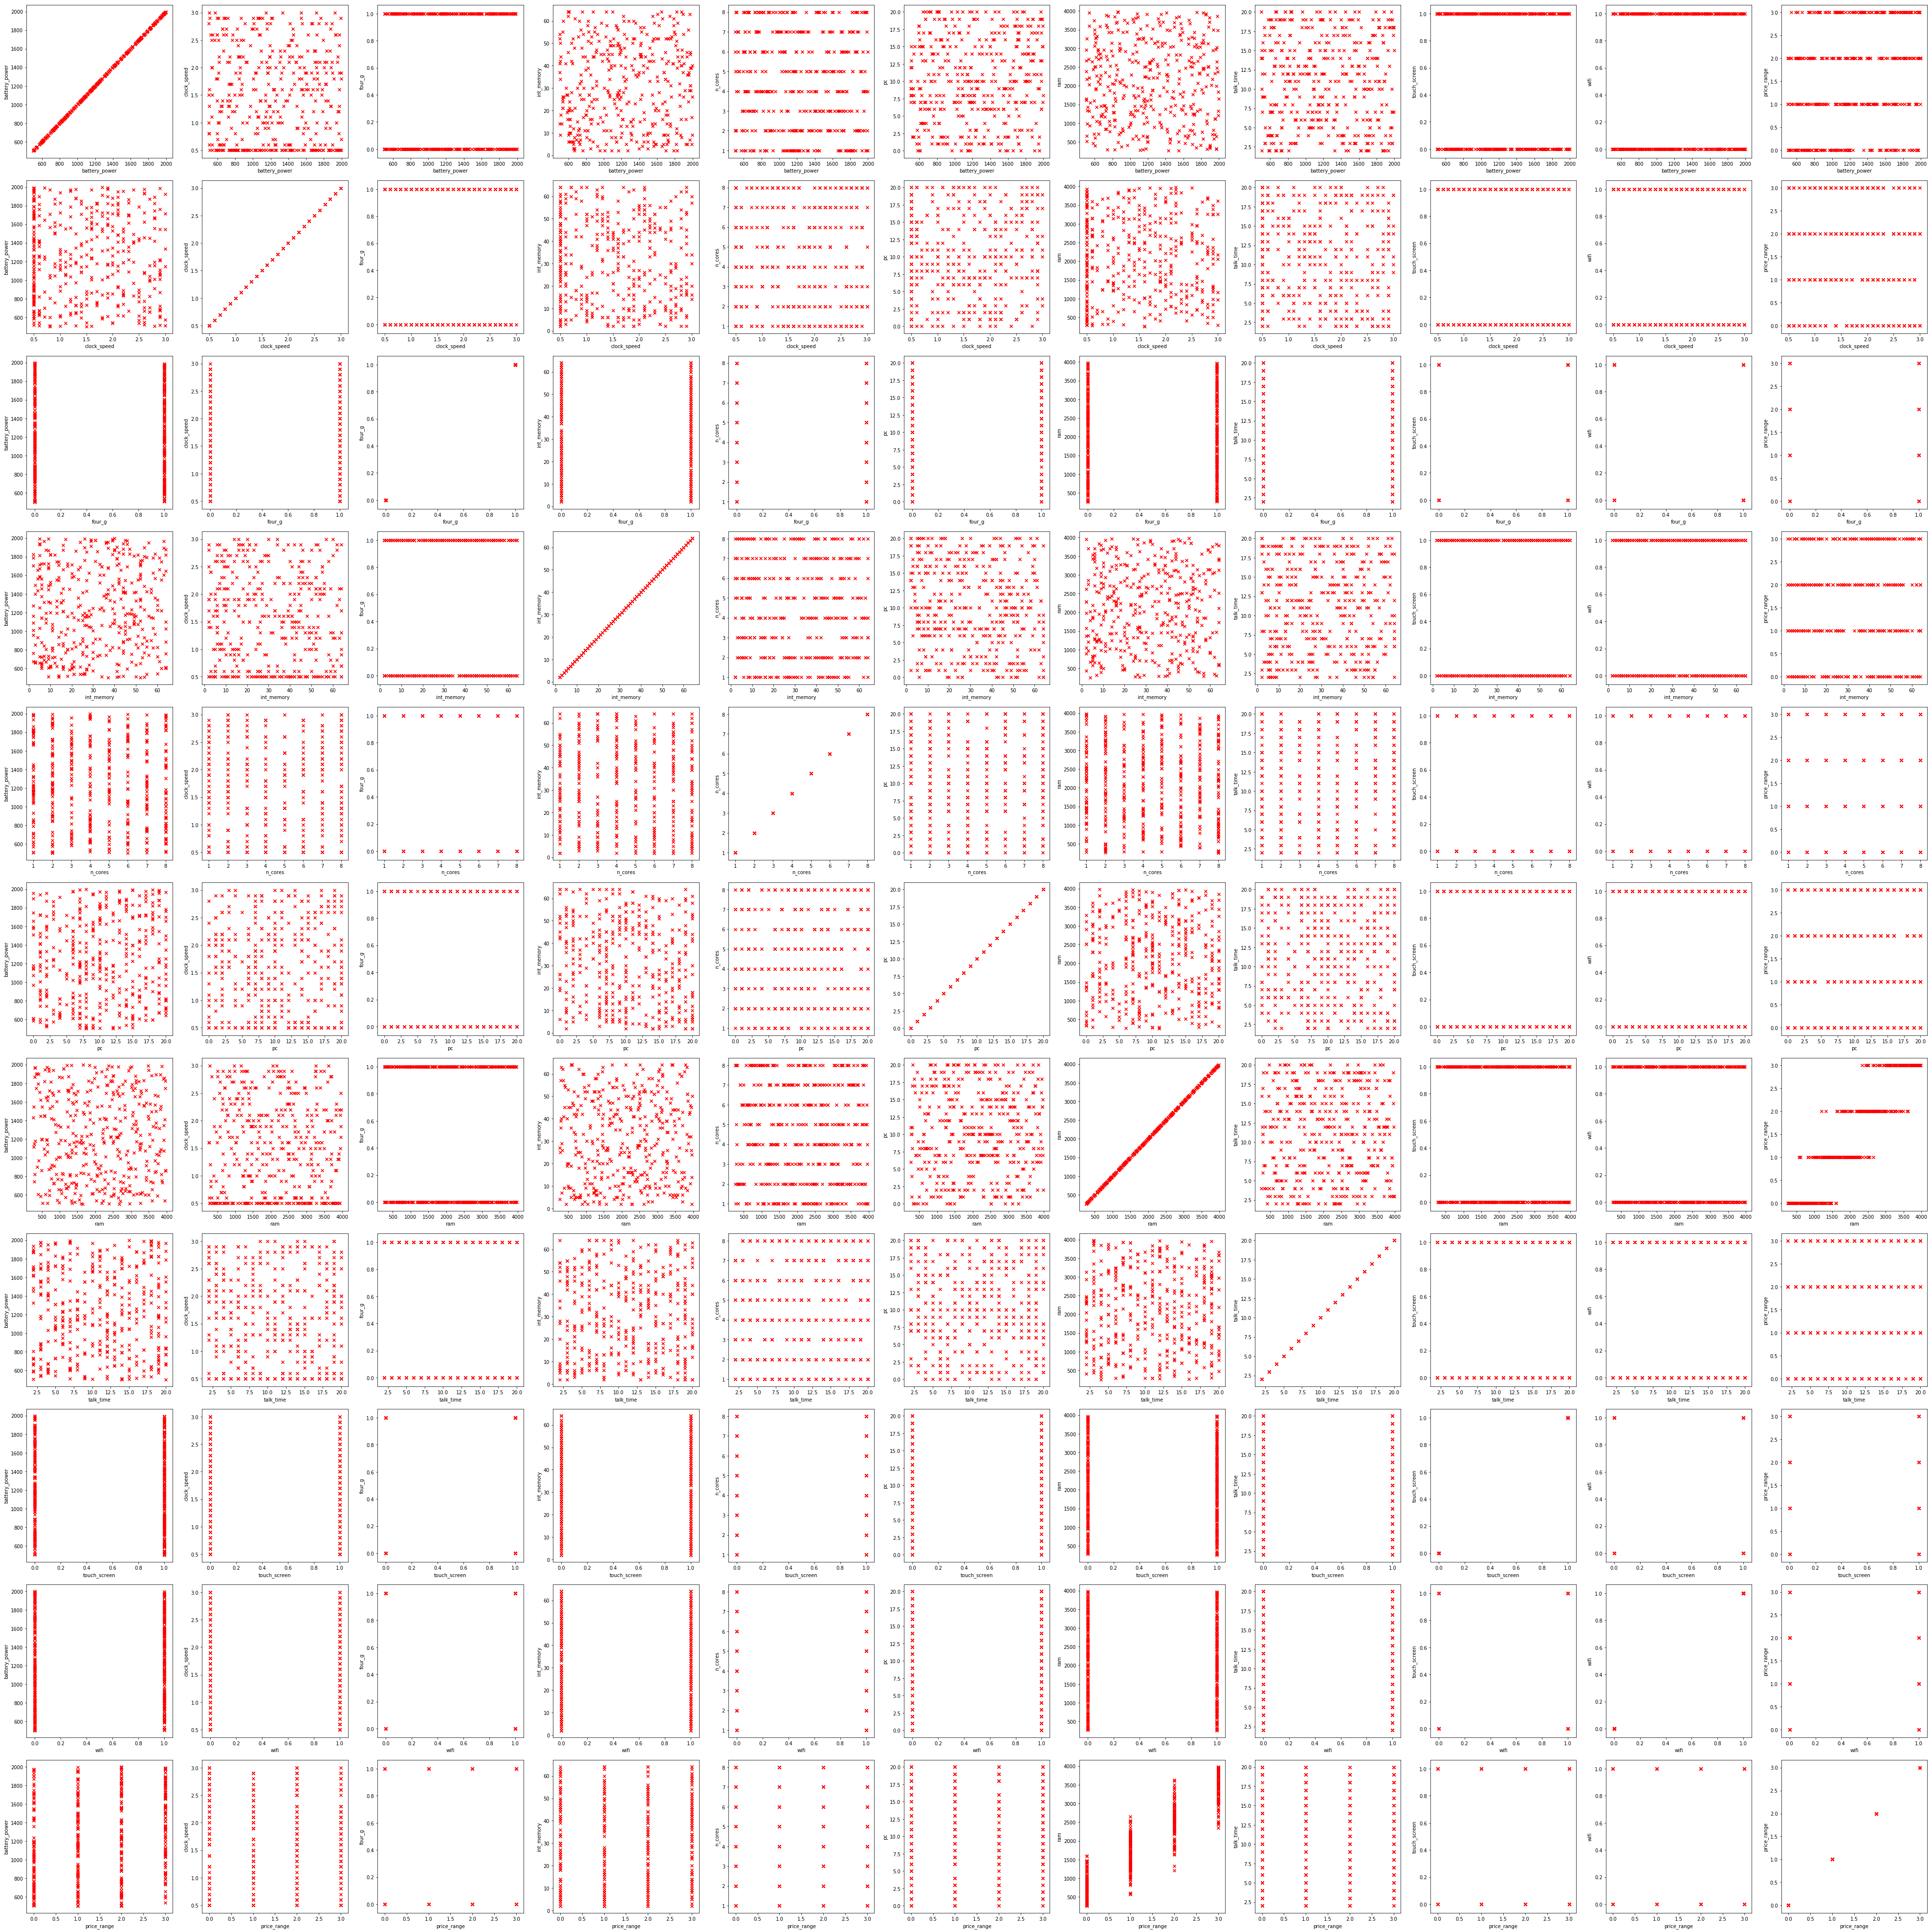

In [3]:
fig, axs = plt.subplots(11, 11, figsize=(55,55))

i = 0

for x in data.columns:
    for y in data.columns:
        ax = axs[i//11, i%11]
        ax.scatter(data[x], data[y], c='r', marker='x')
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        i += 1
plt.tight_layout()

In [26]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('features_scatter_plot.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

### 2.  scatter-plot for "linear-like" features

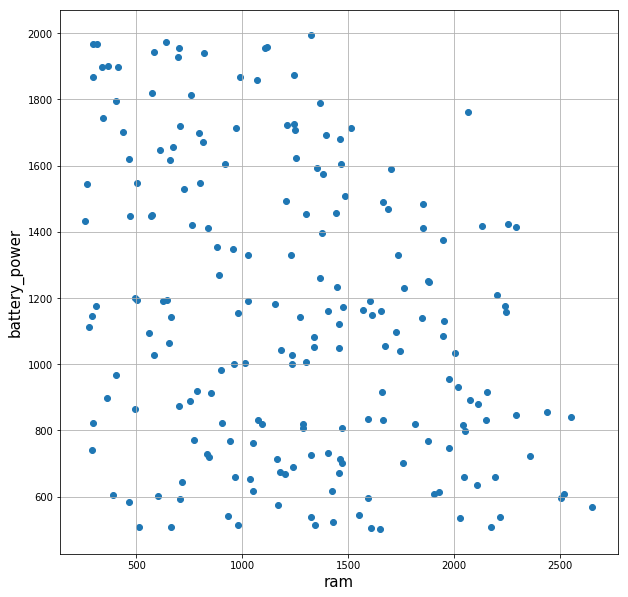

In [116]:
x, y = data['ram'][:200], data['battery_power'][:200]

fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.grid()
plt.xlabel('ram', size=15)
plt.ylabel('battery_power', size=15)
plt.show()

In [117]:
pp = PdfPages('two_features_plot.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

### 3

A linear regression line has an equation of the form $y = a \cdot x + b$, where $x$ is the explanatory variable and $y$ is the dependent variable. The slope of the line is $a$, and $b$ is the intercept (the value of $y$ when $x = 0$)

$$b = \overline{y} - a \cdot \overline{x} $$

$$a = \dfrac{\sum_{i=1}^N(y_i-\overline{y})\cdot(x_i-\overline{x})/N}{\sum_{i=1}^N(x_i-\overline{x})\cdot(x_i-\overline{x})/N} $$



In [111]:
a = (y - np.mean(y)) @ (x - np.mean(x)) / ((x - np.mean(x)) @ (x - np.mean(x)))
b = np.mean(y) - a*np.mean(x)
print('y =', a, '* x +', b)

y = -0.23392016906961632 * x + 1441.5794121305585


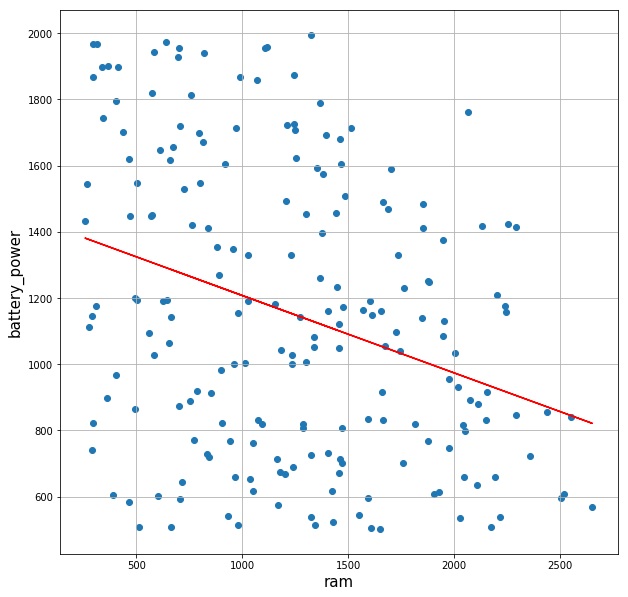

In [120]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, x*a + b, color='r')
plt.grid()
plt.xlabel('ram', size=15)
plt.ylabel('battery_power', size=15)
plt.show()

In [121]:
pp = PdfPages('linreg_plot.pdf', keep_empty=False)
pp.savefig(fig)
pp.close()

<b>Interpret the slope</b>: If the price goes up by 1, then we predict the random access memory size of phone will increase by $ \sim $ 0.001 megabytes. 

### 4

$$\rho  = \frac{\sum_{i=1}^N(y_i-\overline{y})(x_i-\overline{x})/N}{\sigma (x) \cdot \sigma (y)}$$
$$\rho^2 = 1 - \frac{\sum_{i=1}^N(y - \hat{y})^2}{\sum_{i=1}^N(y - \overline{y})^2} $$

In [134]:
-0.506* -0.506

0.256036

In [78]:
cor_coef = ((y - np.mean(y)) @ (x - np.mean(x)) / len(x)) / (np.std(x) * np.std(y))
r2 = 1 - (a*x+b-y)@(a*x+b-y)/((y-np.mean(y))@(y-np.mean(y)))
print('correlation coefficient =', cor_coef)
print('determinacy coefficient =', str(round(cor_coef ** 2 * 1e4) / 100) + '%')

correlation coefficient = -0.5067665433789335
determinacy coefficient = 25.68%


Correlation and determinacy coefficient are a measure of degree of a linear relation between x and y. However, high value of $ \rho $ or $ \rho^2 $ does not warrant any good precision of the regression. It can be connected by adding a few outliers.

We can see on the scatter plot that there are no outliers. Hence, regression predictions quite well fit the data.

### 5

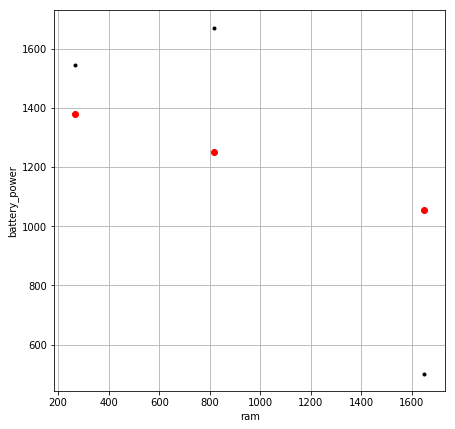

In [141]:
np.random.seed(2)
vals_idx = np.random.choice(len(x), 3)
vals = x[vals_idx]
plt.figure(figsize=(7,7))
plt.scatter(vals, y[vals_idx], c='black', marker='.')
plt.scatter(vals, vals*a + b, c='red', marker='o')
plt.grid()
plt.xlabel('ram')
plt.ylabel('battery_power')
plt.show()

In [139]:
vals

168    1649
15      267
72      815
Name: ram, dtype: int64

In [142]:
vals*a + b

168    1055.845053
15     1379.122727
72     1250.934474
Name: ram, dtype: float64

In [143]:
y[vals_idx]

168     502
15     1546
72     1671
Name: battery_power, dtype: int64

We made a prediction of the target values for given three predictor values. These points depict on scatter plot above. Our predictor works not really exactly, but it is clear that predictor fixes main trend.

### 6

In [145]:
MRAE = np.mean(np.absolute(y - a*x - b)/np.absolute(y))

print('mean relative absolute error :', MRAE)
print('determinacy coefficient :', round(r2, 2))

mean relative absolute error : 0.3663863528413446
determinacy coefficient : 0.26
